<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Logistic_Regression_Project_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
data = files.upload()

Saving heart.csv to heart.csv


## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

<Axes: xlabel='target', ylabel='count'>

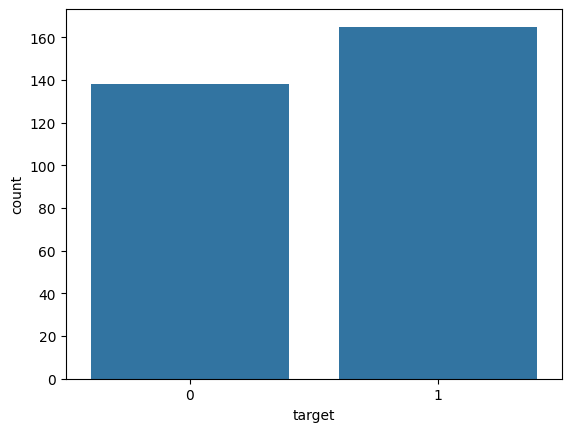

In [8]:
sns.countplot(x='target', data=df)

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

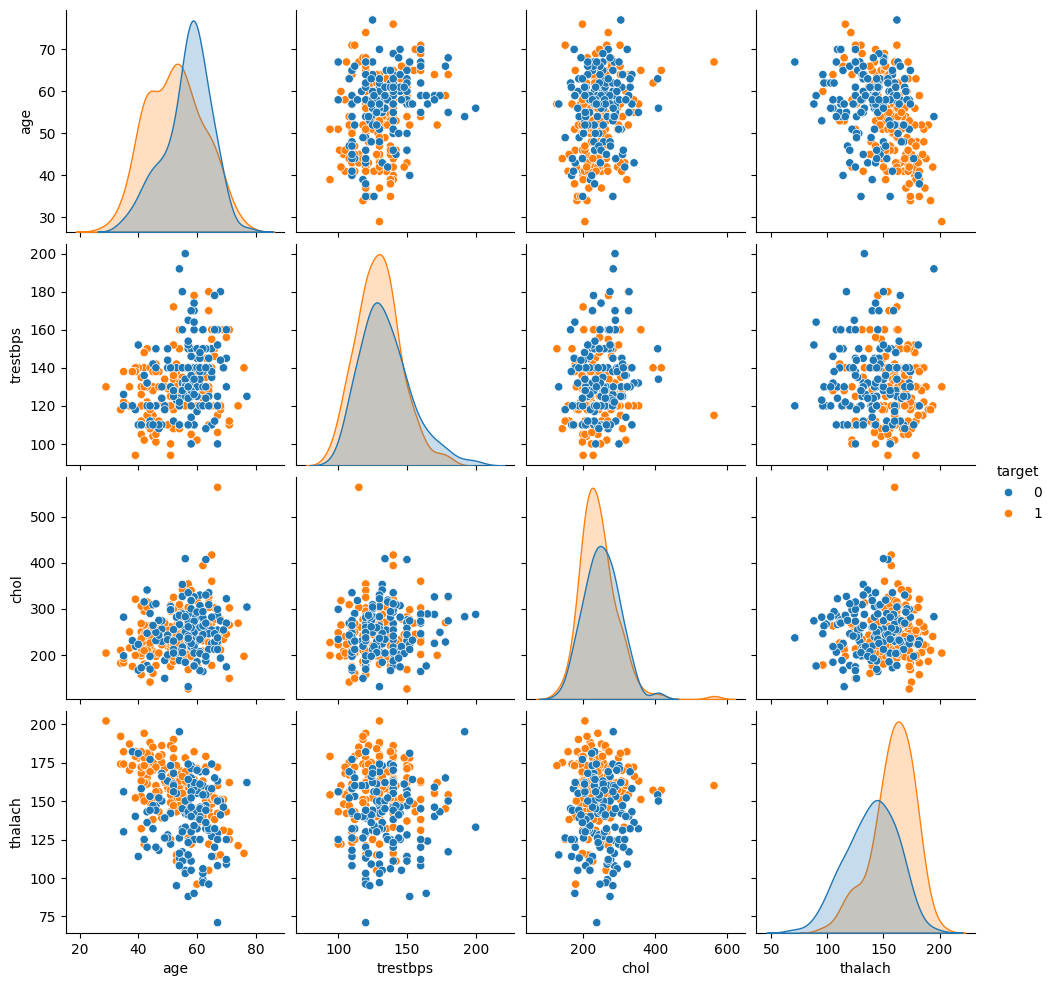

In [9]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target')

**Creating a heatmap that displays the correlation between all the columns.**

<Axes: >

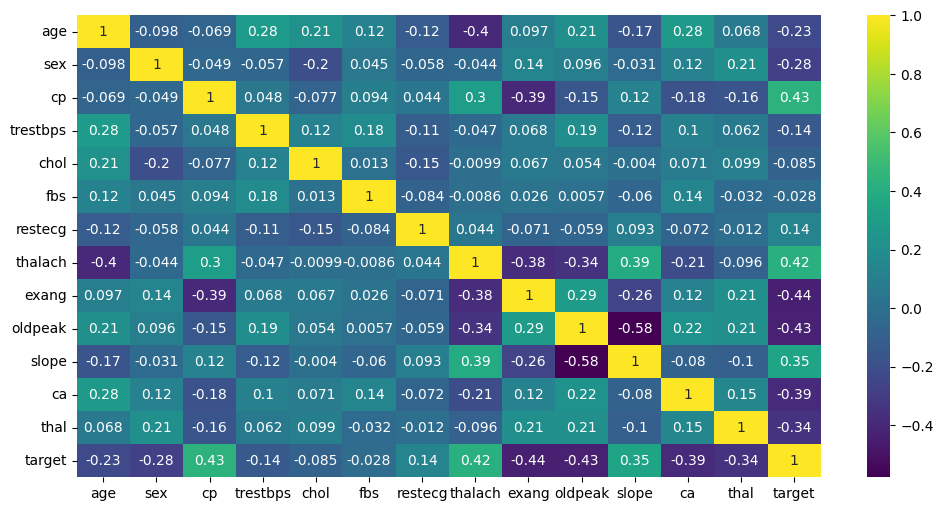

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='viridis', annot=True,)

----
----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [11]:
X = df.drop('target', axis=1)

In [12]:
y= df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Creating a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search.**

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
log_model = LogisticRegressionCV()

In [20]:
# help(LogisticRegressionCV)

In [21]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

**Report back your search's optimal parameters, specifically the C value.**

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [22]:
log_model.C_

array([0.04641589])

### Coeffecients

**Report back the model's coefficients.**

In [23]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

**Create a visualization of the coefficients by using a barplot of their values..**

<ipython-input-24-1cdbe30f2999>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=coeffs, x=X.columns, palette='Set2')


<Axes: xlabel='None', ylabel='None'>

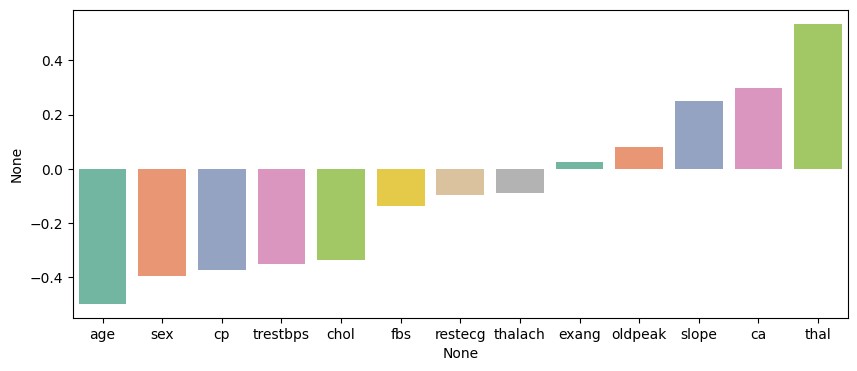

In [24]:
plt.figure(figsize=(10, 4))
coeffs = pd.Series(log_model.coef_[0], index = X.columns)
coeffs = coeffs.sort_values()
sns.barplot(y=coeffs, x=X.columns, palette='Set2')

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
y_pred = log_model.predict(scaled_X_test)
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

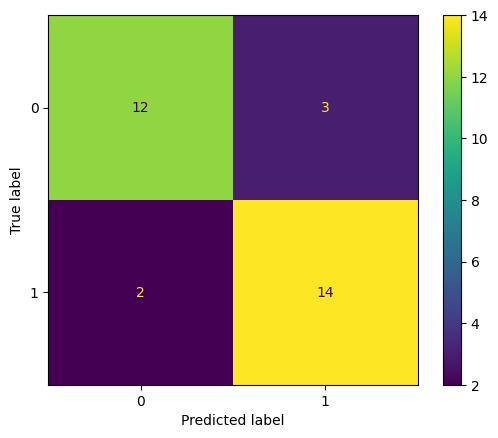

In [27]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [28]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.857143,0.80000,0.827586,15.00000
1,0.823529,0.87500,0.848485,16.00000
accuracy,0.838710,0.83871,0.838710,0.83871
macro avg,0.840336,0.83750,0.838036,31.00000
weighted avg,0.839794,0.83871,0.838373,31.00000


### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [29]:
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay

In [30]:
precision_recall_curve(y_test, y_pred)

(array([0.51612903, 0.82352941, 1.        ]),
 array([1.   , 0.875, 0.   ]),
 array([0, 1]))

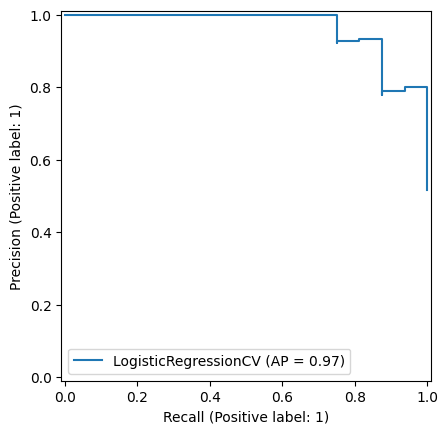

In [31]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [32]:
roc_curve(y_test, y_pred)

(array([0. , 0.2, 1. ]), array([0.   , 0.875, 1.   ]), array([inf,  1.,  0.]))

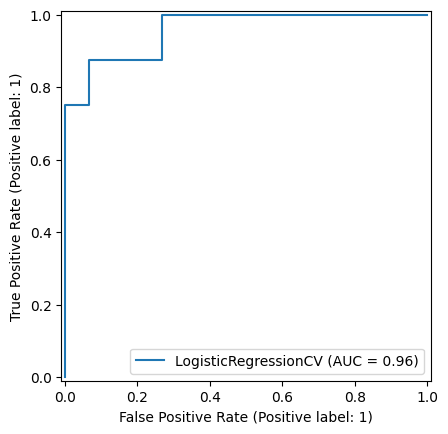

In [33]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [34]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [35]:
log_model.predict(patient)

array([0])

In [36]:
log_model.predict_proba(patient)

array([[9.99999860e-01, 1.39946031e-07]])